import libaries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error , r2_score

# Load Dataset

In [7]:
df = pd.read_csv("financial_regression.csv")
print("Dataset Shape" , df.shape)
df.head()

Dataset Shape (3904, 47)


,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [ ]:
## EDA

In [8]:
df.info

<bound method DataFrame.info of             date  sp500 open  sp500 high  sp500 low  sp500 close  \
0     2010-01-14      114.49    115.1400   114.4200       114.93   
1     2010-01-15      114.73    114.8400   113.2000       113.64   
2     2010-01-18         NaN         NaN        NaN          NaN   
3     2010-01-19      113.62    115.1300   113.5900       115.06   
4     2010-01-20      114.28    114.4500   112.9800       113.89   
...          ...         ...         ...        ...          ...   
3899  2024-10-17      585.91    586.1200   582.1600       582.35   
3900  2024-10-18      584.07    585.3900   582.5800       584.59   
3901  2024-10-21      583.85    584.8500   580.6001       583.63   
3902  2024-10-22      581.05    584.5000   580.3800       583.32   
3903  2024-10-23      581.26    581.7086   574.4150       577.99   

      sp500 volume  sp500 high-low  nasdaq open  nasdaq high  nasdaq low  ...  \
0      115646960.0          0.7200        46.26       46.520     46.22

In [9]:
df.describe()

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
count,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.00000,3719.000000,...,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03
mean,268.732724,270.179765,267.157446,268.779352,1.124206e+08,3.022320,181.394495,182.689784,179.98249,181.431795,...,110.184473,107.931862,109.067990,7.169556e+04,2.252611,145.454975,146.101477,144.761329,145.453861,9.658138e+06
std,121.374890,122.024860,120.663204,121.393684,6.902901e+07,2.656917,122.468973,123.393400,121.43517,122.473492,...,58.454170,56.877967,57.688191,9.790703e+04,2.543622,29.604259,29.754711,29.422517,29.611348,6.182342e+06
min,103.110000,103.420000,101.130000,102.200000,1.708170e+05,0.300000,42.670000,42.821500,41.55000,42.470000,...,40.550000,38.490000,40.090000,3.157000e+03,0.230000,100.920000,100.990000,100.232600,100.500000,1.436508e+06
25%,169.715000,170.175000,169.030000,169.650000,6.699112e+07,1.280000,78.700000,79.150000,78.31500,78.730000,...,69.400000,68.270000,68.820000,2.085900e+04,0.870000,120.555000,121.030000,120.170000,120.590000,5.795310e+06
50%,241.180000,242.080000,239.450000,240.610000,9.239907e+07,2.090000,138.720000,139.420000,138.02000,139.050000,...,83.900000,82.650000,83.210000,3.829500e+04,1.414000,137.620000,138.140000,136.990000,137.710000,8.087993e+06
75%,374.455000,377.800000,371.045000,374.255000,1.367146e+08,3.815000,284.165000,287.590000,281.23000,284.835000,...,143.785000,140.480000,142.040000,8.420700e+04,2.680000,167.770000,168.412500,167.055000,167.835000,1.156729e+07
max,585.910000,586.120000,582.580000,584.590000,7.095045e+08,22.960000,503.070000,503.520000,498.39000,502.960000,...,298.210000,277.000100,295.000000,1.199042e+06,45.392300,253.080000,253.940000,252.520000,253.930000,9.369811e+07


In [10]:
df.isnull().sum()

date                     0
sp500 open             185
sp500 high             185
sp500 low              185
sp500 close            185
sp500 volume           185
sp500 high-low         185
nasdaq open            185
nasdaq high            185
nasdaq low             185
nasdaq close           185
nasdaq volume          185
nasdaq high-low        185
us_rates_%            3728
CPI                   3728
usd_chf                210
eur_usd                210
GDP                   3847
silver open            185
silver high            185
silver low             185
silver close           185
silver volume          185
silver high-low        185
oil open               185
oil high               185
oil low                185
oil close              185
oil volume             185
oil high-low           185
platinum open          185
platinum high          185
platinum low           185
platinum close         185
platinum volume        185
platinum high-low      185
palladium open         185
p

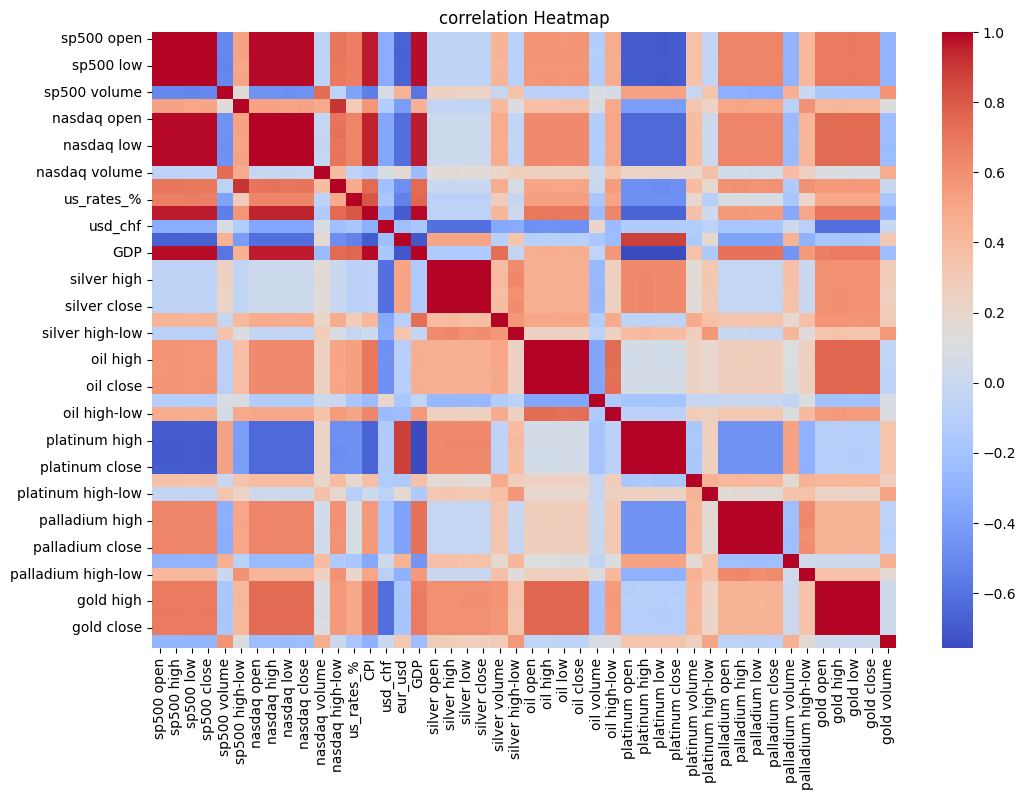

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),cmap="coolwarm")
plt.title("correlation Heatmap")
plt.show()

###Data preprocessing

In [19]:
df = df.dropna(subset=['sp500 close'])
df_numeric = df.select_dtypes(include=[np.number])
df_numeric = df_numeric.fillna(df_numeric.median())
X = df_numeric.drop(columns=['sp500 close'])
y = df_numeric['sp500 close']
X_train,X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)



###Linear regression

In [21]:
lr = LinearRegression()
lr.fit(X_train , y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [25]:
y_pred_lr = lr.predict(X_test)
lr_mse = mean_squared_error(y_test , y_pred_lr)
lr_r2 = r2_score(y_test , y_pred_lr)
print("Linear regression results : ")
print("R2 score :", lr_r2)

Linear regression results : 
R2 score : 0.9999785325105854


In [28]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train , y_train)
y_pred_knn = knn.predict(X_test)
knn_mse = mean_squared_error(y_test , y_pred_knn)
knn_r2 = r2_score(y_test ,y_pred_knn)
print ("KNN Regression Results: ")
print ("MSE: ",knn_mse)
print ("R2 Score", knn_r2)


KNN Regression Results: 
MSE:  3581.0343482741937
R2 Score 0.7718848181419461


In [29]:
print("=======Final Comparison==========")
print("Linear Regression -> MSE:" , lr_mse, ",R2 :",lr_r2)
print("KNN Regression  -> MSE: ",knn_mse ,",R2:",knn_r2)

=======Final Comparison==========
Linear Regression -> MSE: 0.3370043867258158 ,R2 : 0.9999785325105854
KNN Regression  -> MSE:  3581.0343482741937 ,R2: 0.7718848181419461


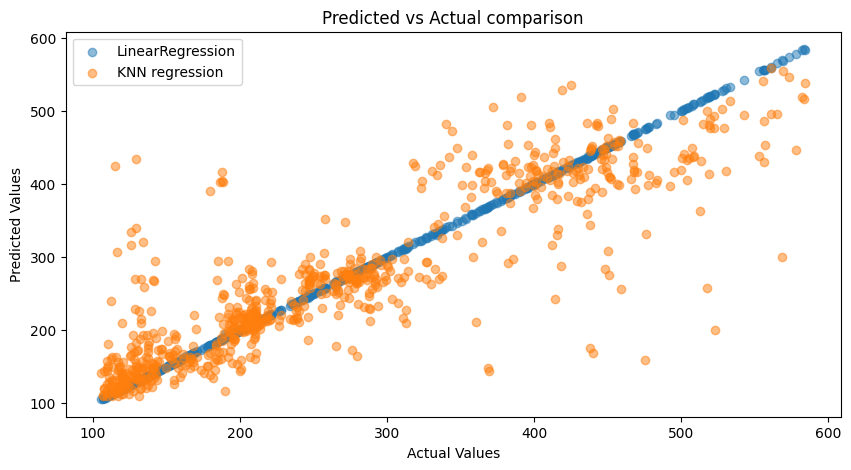

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(y_test ,y_pred_lr,alpha=0.5,label="LinearRegression")
plt.scatter(y_test ,y_pred_knn , alpha=0.5 , label = "KNN regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title ("Predicted vs Actual comparison")
plt.legend()
plt.show()